In [ ]:
#FeaturesDict:'audio', 'label'

In [2]:
import torch
import torchaudio 
import torch.nn as nn
import torch.nn.functional as F
import pandas
import tqdm
from torch.nn.utils.rnn import pad_sequence
from nnAudio.features.mel import MelSpectrogram
import matplotlib.pyplot as plt
from IPython.display import Audio

In [3]:
torch.Tensor(0)

tensor([])

In [4]:
torch.Tensor([0])

tensor([0.])

In [5]:
batch[0].shape

NameError: name 'batch' is not defined

In [6]:
trainset[0]

NameError: name 'trainset' is not defined

In [7]:
#process data before put it in dataloader
#source from https://github.com/KinWaiCheuk/pytorch_template/blob/610a207aab988818f35af36d991dcaaaa9fa1ffe/utils/text_processing.py#L108

def data_processing(data):
    waveforms = []
    labels = []
    
    for batch in data:
        # batch[0].shape = (1, audio_len) tensor
        waveforms.append(batch[0].squeeze(0)) #after squeeze => (audio_len) tensor # remove batch dim
        # batch[2] = string
        # str2int = dict
        # str2int[batch[2]] = int
        #torch.Tensor([str2int[batch[2]]]) = tensor
        label = torch.Tensor([str2int[batch[2]]]) # batch[2] is the label key #str --> int --> tensor
        ## print(f"{label=}")
        labels.append(label)
        
    
        
    waveform_padded = nn.utils.rnn.pad_sequence(waveforms, batch_first=True)  
    labels = nn.utils.rnn.pad_sequence(labels, batch_first=True)

    
    output_batch = {'waveforms': waveform_padded, # it is waveforms instead of spectrograms, this tiny hack can make the code work with existing training function
             'labels': labels,
             }
    return output_batch

#after data processing, return a dict with waveforms [torch.Size: 3 dimensions] and labels

In [8]:
mel_layer = MelSpectrogram(sr=16000, 
                           n_fft=2048,
                           win_length=None,
                           n_mels=100, 
                           hop_length=512,
                           window='hann',
                           center=True,
                           pad_mode='reflect',
                           power=2.0,
                           htk=False,
                           fmin=0.0,
                           fmax=None,
                           norm=1,
                           trainable_mel=False,
                           trainable_STFT=False,
                           verbose=True,)
#sr: sampling rate, 1s take how many datapoint
#n_mels: the more , the better spectrogram
#hop_length: distance of window move

STFT kernels created, time used = 0.1116 seconds
STFT filter created, time used = 0.0033 seconds
Mel filter created, time used = 0.0034 seconds


In [9]:
batch_size = 8

In [ ]:
trainset = torchaudio.datasets.SPEECHCOMMANDS('./',url='speech_commands_v0.02',folder_in_archive='SpeechCommands',download = True, subset = 'training')

#trainset Returns (waveform[0], sample_rate[1], label[2], speaker_id, utterance_number)

  0%|          | 0.00/2.26G [00:00<?, ?B/s]

In [4]:
trainset[0]

#trainset[idx] Returns (waveform[0], sample_rate[1], label[2], speaker_id, utterance_number)
#16000 sampling rate

(tensor([[-0.0658, -0.0709, -0.0753,  ..., -0.0700, -0.0731, -0.0704]]),
 16000,
 'backward',
 '0165e0e8',
 0)

In [5]:
trainset[9000][0].shape

#for 1st sample
#torch.Size([1, 16000]): 1 sample, include 16000points
#trainset[0][2] --> label of 1st sample
#since shape same, audio same lenght, no need preprocess audio

torch.Size([1, 16000])

In [6]:
A = trainset[0][0] #1st sample
B = trainset[1][0] #2nd sample
C = trainset[2][0] 
C
#torc.Size(1, 16000]), 16000 data point in tensor

tensor([[-6.1035e-05, -1.8311e-04, -2.4414e-04,  ..., -9.1553e-05,
          2.4414e-04,  4.2725e-04]])

In [7]:
label_class = set()

for i in tqdm.tqdm(trainset):
    label_class.update([i[2]])
    
#use update() to iterate trainset, make a set()


100%|█| 84843/84843 [01:03<00:00


In [8]:
len(label_class)

35

In [9]:
str2int = {}
for idx, key in enumerate(sorted(label_class)):
    str2int[key] = idx
    
    #iterate label_class [set]
    #create dict to map str[label] to index 
    #sorted() 

In [ ]:
str2int

In [10]:
str2int = \
{'backward': 0,
 'bed': 1,
 'bird': 2,
 'cat': 3,
 'dog': 4,
 'down': 5,
 'eight': 6,
 'five': 7,
 'follow': 8,
 'forward': 9,
 'four': 10,
 'go': 11,
 'happy': 12,
 'house': 13,
 'learn': 14,
 'left': 15,
 'marvin': 16,
 'nine': 17,
 'no': 18,
 'off': 19,
 'on': 20,
 'one': 21,
 'right': 22,
 'seven': 23,
 'sheila': 24,
 'six': 25,
 'stop': 26,
 'three': 27,
 'tree': 28,
 'two': 29,
 'up': 30,
 'visual': 31,
 'wow': 32,
 'yes': 33,
 'zero': 34
}

#create dict from dataset_label to int

In [11]:
waveforms = [A,B,C]

In [ ]:
#for idx, i in enumerate(trainset):
    #if i[0].shape[1]!=16000:
        #print(idx)
        
#show not all audio are in same lenght 

In [13]:
trainset[40][0].shape

torch.Size([1, 10922])

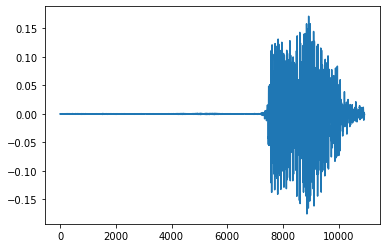

In [14]:
plt.plot(trainset[40][0][0])

#plot those 16000 sampling point

In [15]:
Audio(trainset[40][0][0], rate=16000)


#from IPython.display import Audio
#diff sampling rate: low --> low pitch, low speed

In [12]:
sample_idx = 5

In [16]:
trainset[sample_idx][0].shape

torch.Size([1, 16000])

In [19]:
mel_output_sample = mel_layer(trainset[sample_idx][0][0])


In [20]:
mel_output_sample

tensor([[[1.1218e-05, 7.8554e-06, 1.0171e-05,  ..., 9.2048e-05,
          6.2789e-05, 1.0089e-04],
         [8.8428e-05, 5.4556e-05, 4.2421e-05,  ..., 8.9731e-04,
          1.4681e-04, 3.1011e-04],
         [1.1456e-04, 1.9463e-04, 1.2023e-04,  ..., 1.8110e-03,
          3.1303e-04, 4.1248e-04],
         ...,
         [3.9348e-07, 4.6287e-07, 1.0509e-06,  ..., 7.5567e-07,
          6.3953e-07, 1.0705e-06],
         [2.1862e-07, 2.7538e-07, 3.6169e-07,  ..., 4.1981e-07,
          3.4865e-07, 5.5478e-07],
         [1.0552e-07, 1.5435e-07, 1.3894e-07,  ..., 3.4982e-07,
          2.1302e-07, 3.4513e-07]]])

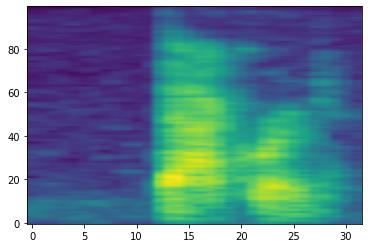

In [21]:
plt.imshow(torch.log(mel_output_sample[0]), aspect='auto', origin='lower')

#y-axis : frequency 
#x-axis: time 

#aspect: auto adjust spectrogram size
#origin='lower' make both origin in left bottom corner

#MelSpectrogram process audio to visual

In [22]:
random_audio = torch.randn(4, 16000)   #4sample
mel_output_sample = mel_layer(random_audio)
mel_output_sample.shape

#torch.Size([4,100,32]) --> 4sample

torch.Size([4, 100, 32])

In [23]:
mel_output_sample.shape

#MelSpectrogram  --> mel_layer --> mel_output
#convert audio to <function Tensor.type>, got width and height

torch.Size([4, 100, 32])

In [ ]:
#pad_sequence(waveforms).size()

In [117]:
trainloader = torch.utils.data.DataLoader(trainset,
                              batch_size=batch_size,
                              collate_fn=lambda x: data_processing(x))

In [ ]:
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False)
#testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [29]:
testset = torchaudio.datasets.SPEECHCOMMANDS('./',url='speech_commands_v0.02',folder_in_archive='SpeechCommands',download = True, subset = 'testing')

In [118]:
#speech_command_transform = Speech_Command_label_Transform(trainset)
testloader = torch.utils.data.DataLoader(testset,
                              batch_size=batch_size,
                              collate_fn=lambda x: data_processing(x))

In [ ]:
#iter_loader = iter(trainloader)

In [ ]:
#next(iter_loader).shape

In [91]:
batch = next(iter(trainloader))

#batch type: dict
#show 1st batch

batch[2]='backward'
str2int[batch[2]]=0
label=tensor([0.])
batch[2]='backward'
str2int[batch[2]]=0
label=tensor([0.])
batch[2]='backward'
str2int[batch[2]]=0
label=tensor([0.])
batch[2]='backward'
str2int[batch[2]]=0
label=tensor([0.])
batch[2]='backward'
str2int[batch[2]]=0
label=tensor([0.])
batch[2]='backward'
str2int[batch[2]]=0
label=tensor([0.])
batch[2]='backward'
str2int[batch[2]]=0
label=tensor([0.])
batch[2]='backward'
str2int[batch[2]]=0
label=tensor([0.])


In [81]:
batch['labels']

tensor([], size=(8, 0))

In [35]:
batch['waveforms'].shape

torch.Size([3, 16000])

In [34]:
for batch in tqdm.tqdm(trainloader):
    pass

#check if trainloader is divided in batch successfully

100%|█| 10606/10606 [01:06<00:00


In [66]:
mel_output_batch = mel_layer(batch['waveforms'])
mel_output_batch.shape



#batch here = 1st batch
#extract 1st batch via dict [key]:waveforms
#batch['waveforms'].shape  --> torch.Size([3, 16000])

torch.Size([8, 100, 32])

In [37]:
mel_output_batch4 = mel_output_batch.unsqueeze(1)

#conv2d need to be 4 dimension [ batch, channel, width, height]
#unsqueeze: add dimension into index[1]


In [38]:
mel_output_batch4.shape

torch.Size([3, 1, 100, 32])

In [ ]:
#testloader = torch.utils.data.DataLoader(testset,
                              #collate_fn=lambda x: data_processing(x,text_transform))

In [119]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,5)    
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*22*5,120) 
        #have to follow input, x.shape before flattern: 
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,35)
        
    def forward(self,x):
        #print(f"{x.shape=}")
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        #print(f'before flatten x.shape = {x.shape}')
        x = torch.flatten(x,1)
        #print(f'x.shape = {x.shape}')
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
#define the network

# print(f'before flatten x.shape = {x.shape}')
# print(f'x.shape = {x.shape}')

In [51]:
net(mel_output_batch4)

#before flatten x.shape = torch.Size([8, 16, 22, 5]) --> each batch :8 image


x.shape=torch.Size([3, 1, 100, 32])
before flatten x.shape = torch.Size([3, 16, 22, 5])
x.shape = torch.Size([3, 1760])


tensor([[-0.2267,  0.0755,  0.0372,  0.2965, -0.2840, -0.4764,  0.2786, -0.0147,
          0.1443, -0.2037, -0.0694, -0.0178,  0.0128, -0.0221,  0.1838, -0.1157,
         -0.2824, -0.2018,  0.2056, -0.1863,  0.0056, -0.0183,  0.0143, -0.0204,
          0.0114, -0.0581,  0.1958, -0.0347, -0.0105,  0.0676,  0.0302, -0.1564,
          0.0487,  0.2856,  0.0161],
        [-0.1501,  0.0622,  0.0428,  0.1879, -0.1552, -0.2427,  0.1517, -0.0433,
          0.0546, -0.1063, -0.0973,  0.0453, -0.0568, -0.0374,  0.0961, -0.0076,
         -0.1752, -0.0845,  0.1367, -0.0547,  0.0143, -0.0258,  0.0372, -0.0395,
         -0.0179, -0.1018,  0.1353,  0.0596,  0.0027,  0.0532, -0.0067, -0.0989,
          0.0164,  0.1068,  0.0112],
        [-0.1071,  0.1082,  0.0270,  0.1456, -0.1330, -0.1591,  0.1271, -0.0081,
          0.0748, -0.0606, -0.1240,  0.0934, -0.0631, -0.0382,  0.0892, -0.0408,
         -0.1462, -0.1167,  0.0599,  0.0364,  0.0514,  0.0711,  0.0627, -0.0222,
         -0.0690, -0.1303,  0.0810,

In [120]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#define loss function and optimizer

#normally use cross-entropyloss for classification problem
#nn.MSELoss for regression problem


In [ ]:
#for name, i in net.named_parameters():
    #print(f"{name}")
    
#list out the parameters that can be trained

In [53]:
trainloader

'waveforms'

In [54]:
labels

'labels'

In [56]:
batch['waveforms'].shape

torch.Size([8, 16000])

In [121]:
for epoch in range(2):
    Loss = 0
    
    for batch in tqdm.tqdm(trainloader):
        mel_output_batch = mel_layer(batch['waveforms']) #3-dimension
        mel_output_batch4 = mel_output_batch.unsqueeze(1)  #4-dimension
        
        #print(f'{mel_output_batch4}')
        
        optimizer.zero_grad()
        outputs = net(mel_output_batch4)
        ##print(f"{batch['labels'].shape=}")
        ##print(f'{outputs.shape=}')
        
        #batch['labels'] =2 dimension [batch, 1]
        #batch['labels'].squeeze(1) = 1 dimension [batch]
        loss = criterion(outputs, batch['labels'].squeeze(1).long()) 

        loss.backward()
        optimizer.step()
        
        
#inputs have to be 4-dimension tensors
#outputs is the labels, required to be 1 dimension

#Train the network in the training data

100%|█| 10606/10606 [08:21<00:00
100%|█| 10606/10606 [08:17<00:00


In [114]:
PATH = './speechcommands_net.pt'
torch.save(net.state_dict(), PATH)
#save the trained model as PATH

#for future use, open empty jupyter
#1.define the network
#2.net = Net()
#net.load_state_dict(torch.load(PATH)) 

In [ ]:
import matplotlib.pyplot as plt
dataiter = iter(testloader)
inputs, labels = dataiter.next()
print(f'{(inputs.shape)}')

#iterate testloader

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

#load back saved model


In [ ]:
outputs = net(inputs)
#subs testing inputs into saved model

In [ ]:
correct = 0
total = 0
#initialize number of testset

with torch.no_grad():
    for inputs, labels in tqdm.tqdm(testloader):
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        #max function will give 2 outcome
        #x_random = torch.randn(8,10)
        #torch.max(x_random,1) 
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy: %d %%' % (100 * correct / total))

#calculate the accuracy of the network on the testset